<a href="https://colab.research.google.com/github/sakshivohra/skinDiseaseCNN-Final-/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import pandas as pd

In [ ]:
model = Sequential()

Adding Convolutional layers

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape = (64,64,3), activation = 'relu'))

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape = (64,64,3), activation = 'relu'))

Adding Maxpooling layer

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))

Add flattening layer

In [ ]:
model.add(Flatten())

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


Adding hidden layers

In [ ]:
model.add(Dense(units=  128, kernel_initializer= 'uniform', activation = 'relu'))

In [ ]:
model.add(Dense(units=  128, kernel_initializer= 'uniform', activation = 'relu'))

In [ ]:
model.add(Dense(units= 64, kernel_initializer= 'uniform', activation = 'relu'))

In [ ]:
model.add(Dense(units= 64, kernel_initializer= 'uniform', activation = 'relu'))

Adding Output layer

In [ ]:
model.add(Dense(activation = 'softmax', units= 5, kernel_initializer= 'uniform'))

Preprocessing the data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, height_shift_range = 0.2, width_shift_range = 0.2, horizontal_flip = True, vertical_flip = True)
test_datagen = ImageDataGenerator(rescale = 1)

Loading the train and test data

In [ ]:
!unzip Skin\ Diseases.zip -d Skin\ Diseases

In [ ]:
x_train = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Skin Diseases/train', target_size = (64, 64), batch_size = 32, class_mode = 'categorical')
x_test = test_datagen.flow_from_directory(r'/content/drive/MyDrive/Skin Diseases/test', target_size = (64, 64), batch_size = 32, class_mode = 'categorical')

Found 18988 images belonging to 5 classes.
Found 575 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'Acne': 0, 'Melanoma': 1, 'Psoriasis': 2, 'Rosacea': 3, 'Vitiligo': 4}

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Fitting the data

In [23]:
model.fit(x_train, steps_per_epoch =100, epochs = 150, validation_data = x_test, validation_steps = 63)

Epoch 1/150
100/100 [==============================] - 1310s 13s/step - loss: 1.2635 - accuracy: 0.5263 - val_loss: 472.7009 - val_accuracy: 0.2017
Epoch 2/150
100/100 [==============================] - 976s 10s/step - loss: 0.8343 - accuracy: 0.6648
Epoch 3/150
100/100 [==============================] - 782s 8s/step - loss: 0.7208 - accuracy: 0.7109
Epoch 4/150
100/100 [==============================] - 652s 7s/step - loss: 0.7142 - accuracy: 0.7171
Epoch 5/150
 53/100 [==============>...............] - ETA: 4:24 - loss: 0.6611 - accuracy: 0.7677

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


100/100 [==============================] - 555s 6s/step - loss: 0.6716 - accuracy: 0.7642
Epoch 6/150
100/100 [==============================] - 471s 5s/step - loss: 0.6070 - accuracy: 0.7914
Epoch 7/150
100/100 [==============================] - 390s 4s/step - loss: 0.6097 - accuracy: 0.7823
Epoch 8/150
100/100 [==============================] - 327s 3s/step - loss: 0.5472 - accuracy: 0.8098
Epoch 9/150
100/100 [==============================] - 277s 3s/step - loss: 0.5574 - accuracy: 0.8040
Epoch 10/150
100/100 [==============================] - 244s 2s/step - loss: 0.5127 - accuracy: 0.8267
Epoch 11/150
100/100 [==============================] - 227s 2s/step - loss: 0.5914 - accuracy: 0.7891
Epoch 12/150
100/100 [==============================] - 208s 2s/step - loss: 0.5440 - accuracy: 0.8047
Epoch 13/150
100/100 [==============================] - 171s 2s/step - loss: 0.5444 - accuracy: 0.8070
Epoch 14/150
100/100 [==============================] - 130s 1s/step - loss: 0.5341 - accu

In [27]:
history = model.history.history
for key in history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


In [28]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

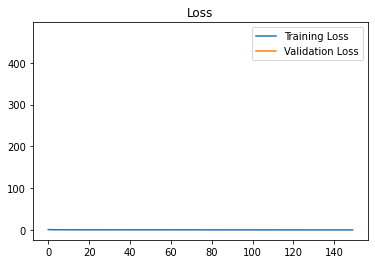

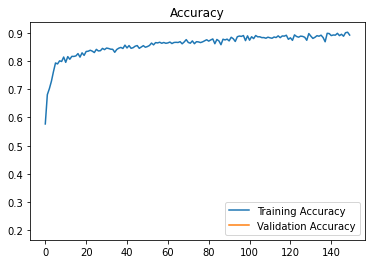

In [30]:
import matplotlib.pyplot as plt
plot_metrics(history) 

Saving the model

In [31]:
model.save("Skin_Diseases.h5")